# Predicting House Prices

## 1. Data Preprocessing

### 1.1 Import Libraray

In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### 1.2 Read Data

In [8]:
df = pd.read_csv("/Users/trevionnowakowski/Code/personallab/housepricetrain.csv")

In [9]:
#Check first 5
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [10]:
#Check Last 5
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

### 1.3 Sanity Check of Data

In [11]:
#Check Shape
df.shape #Potentially # we can see 81 features

(1460, 81)

In [12]:
#Check All dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
#Check missing values for each feature
df.isnull().sum()[df.isnull().sum()>0] #Check for missing values

Series([], dtype: int64)

In [33]:
#Check the percentage of the missing values compare to overall data
df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]*100 

Series([], dtype: float64)

In [16]:
#Check for duplicated entries
df.duplicated().sum() #no duplicates

np.int64(0)

In [17]:
# Identify the garbage values:
for i in df.select_dtypes("object").columns:
    print(df[i].value_counts())
    print("*****"*10)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
**************************************************
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
**************************************************
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
**************************************************
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
**************************************************
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
**************************************************
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
**************************************************
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
**************************************************
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: in

### 1.4 EDA

In [18]:
# Descriptive Stats:
df.describe().T # add include = 'object' to show object type

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

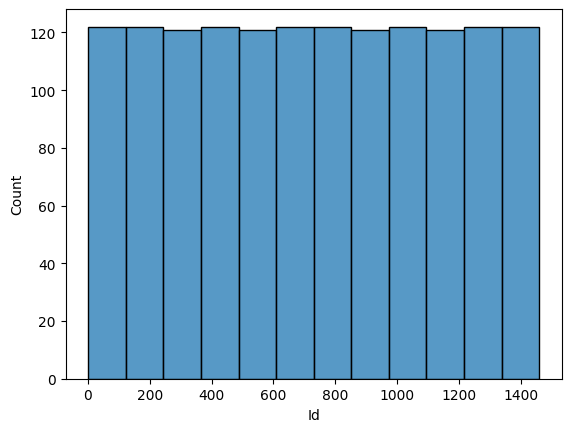

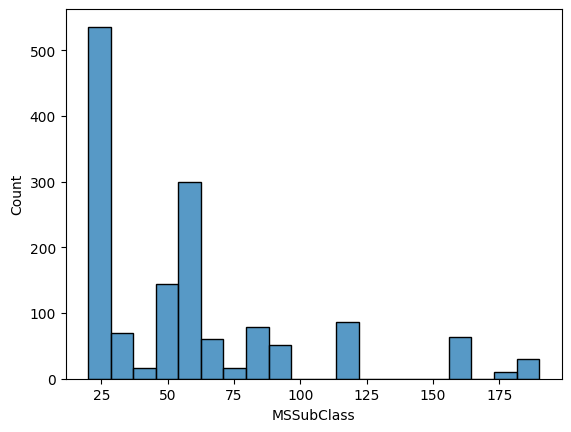

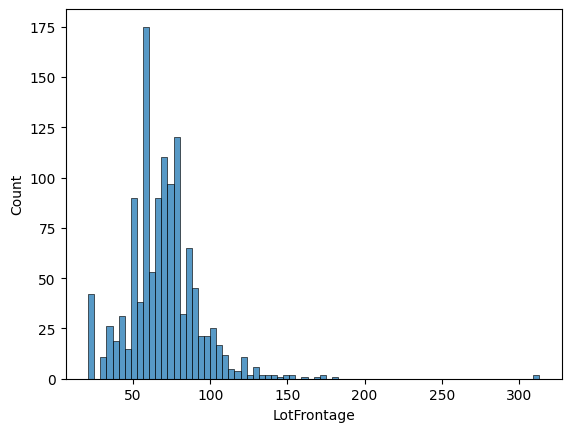

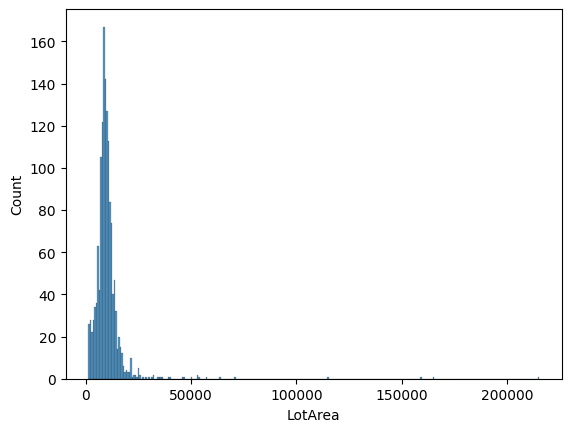

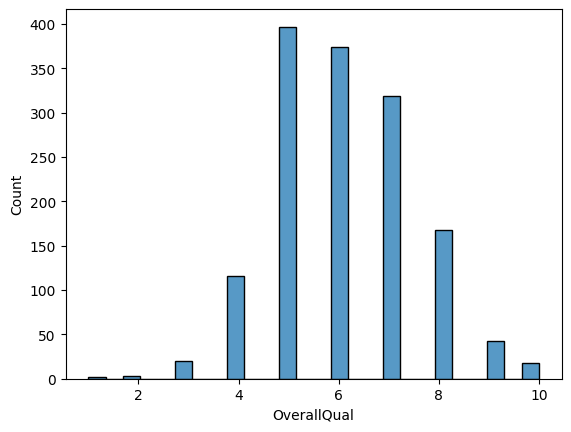

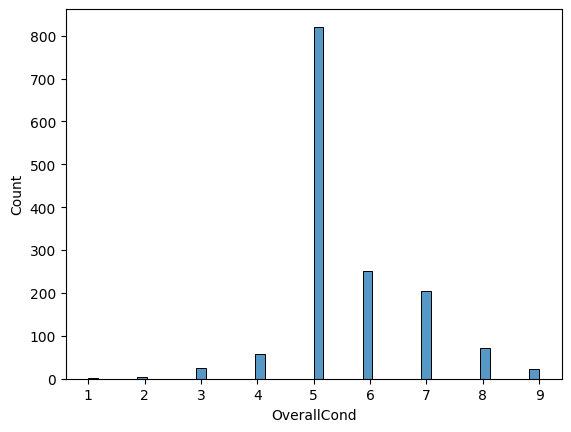

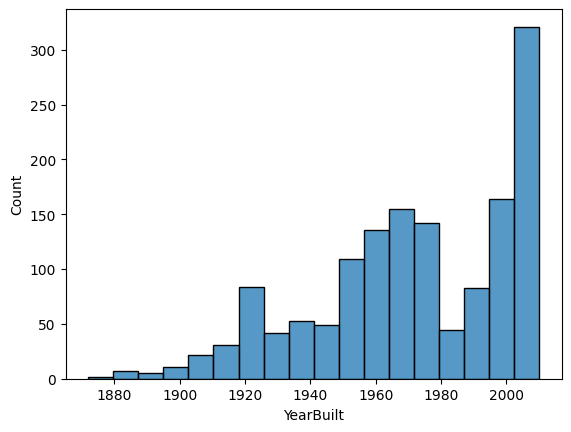

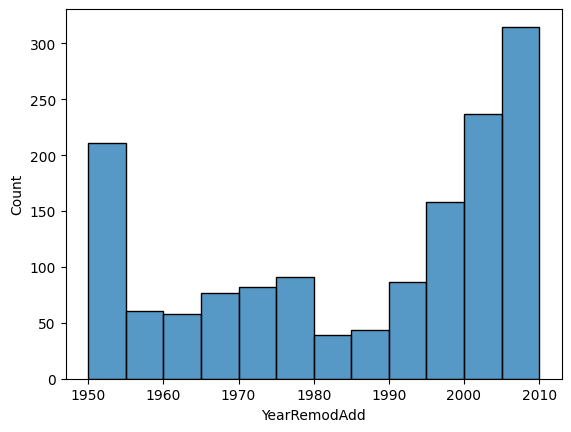

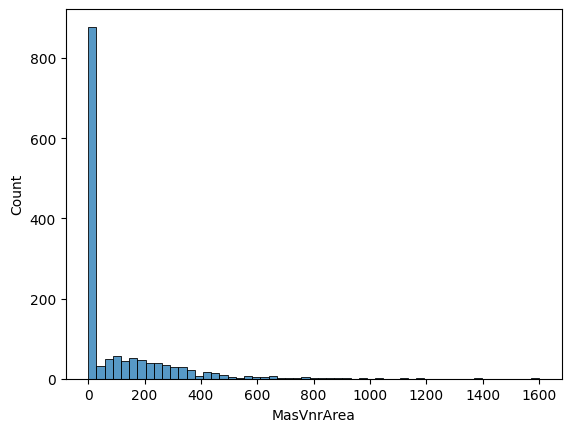

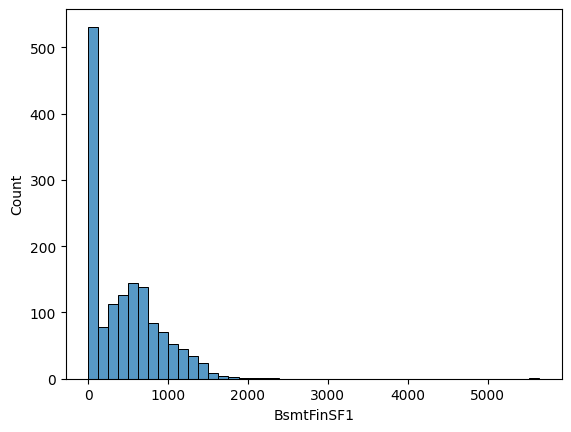

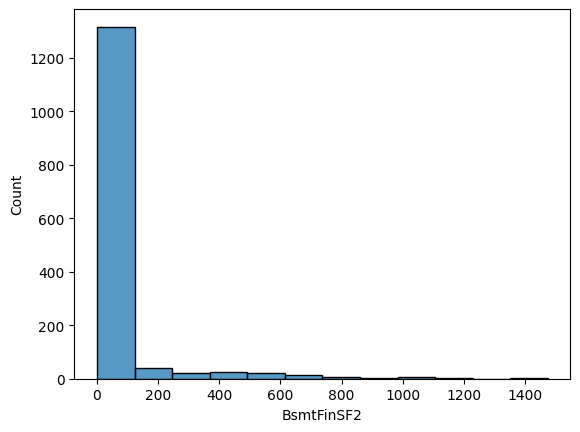

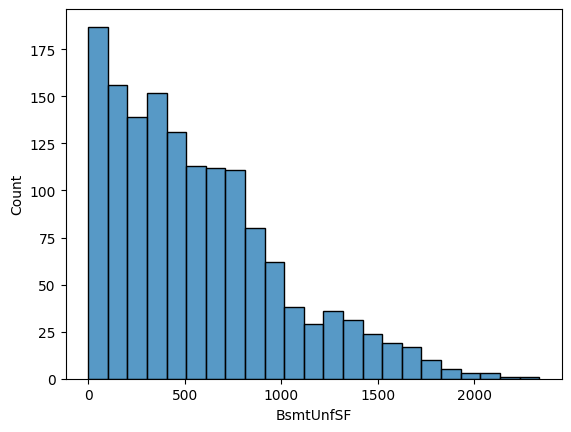

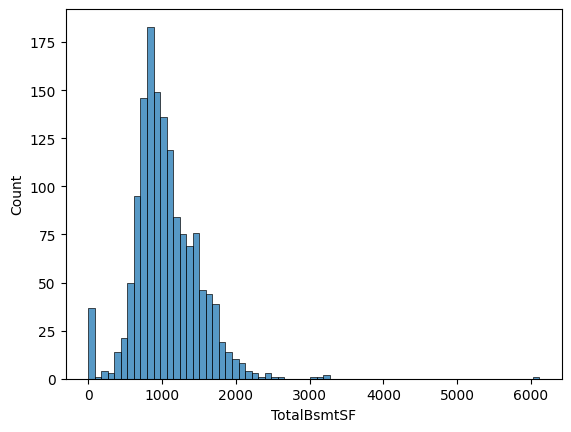

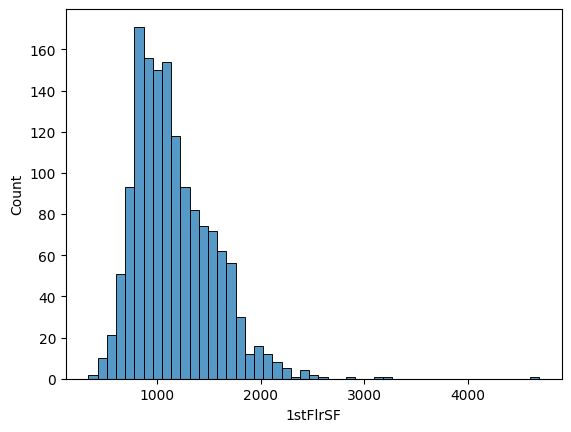

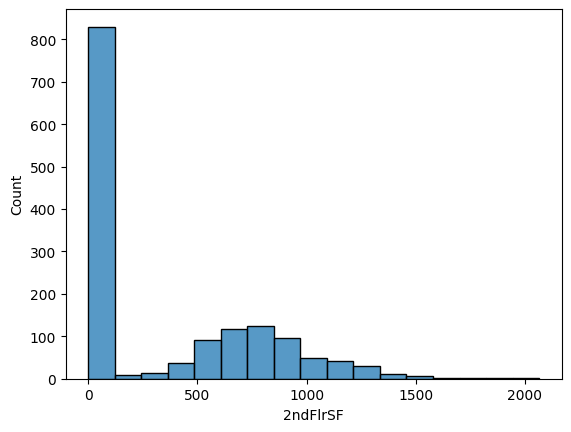

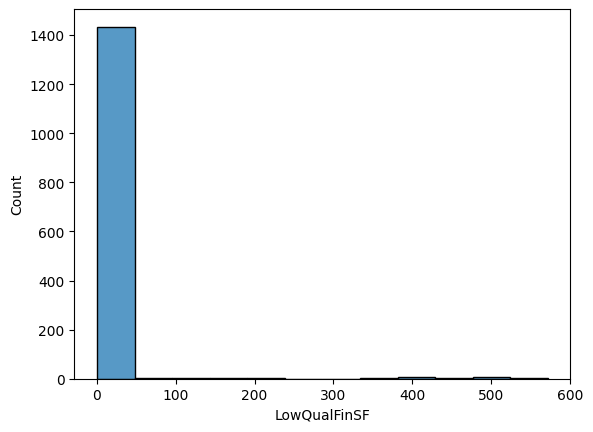

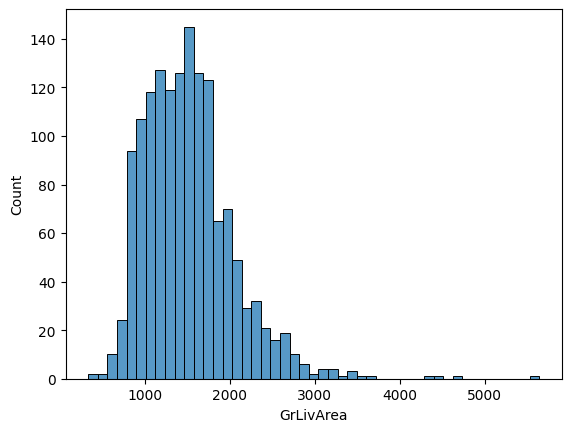

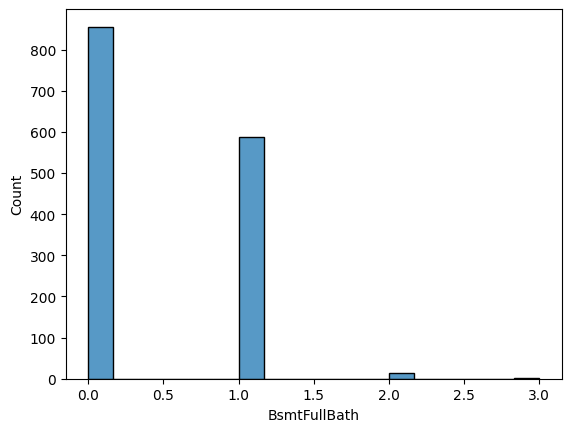

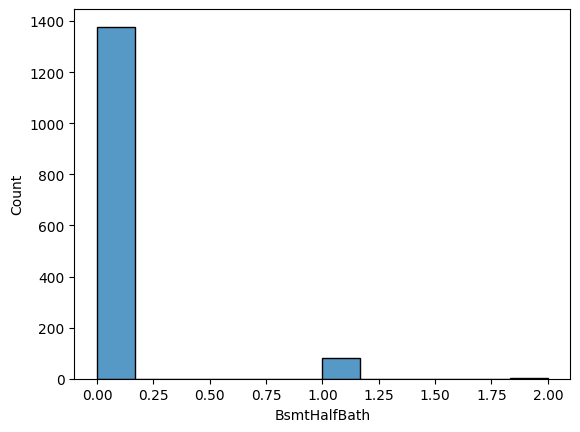

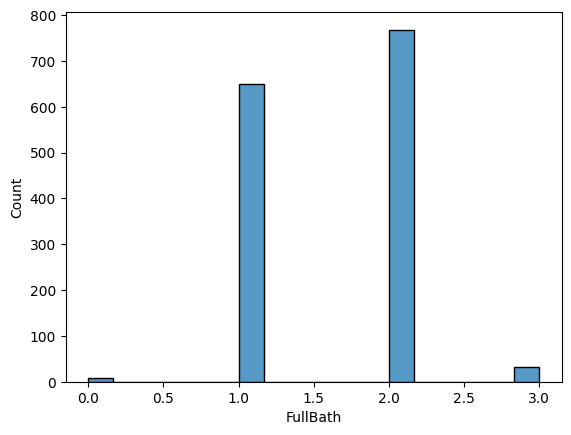

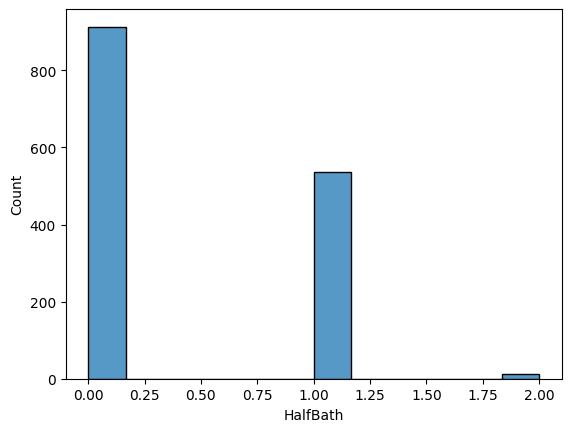

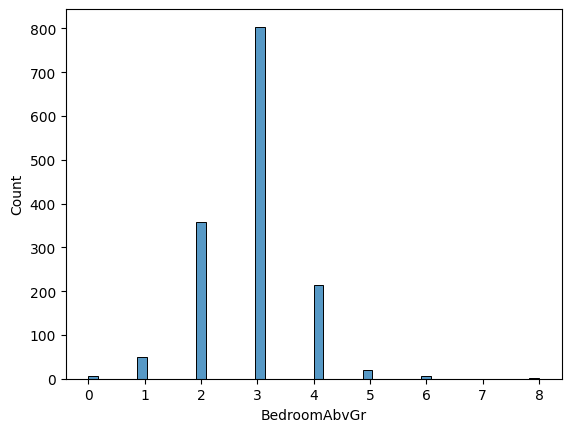

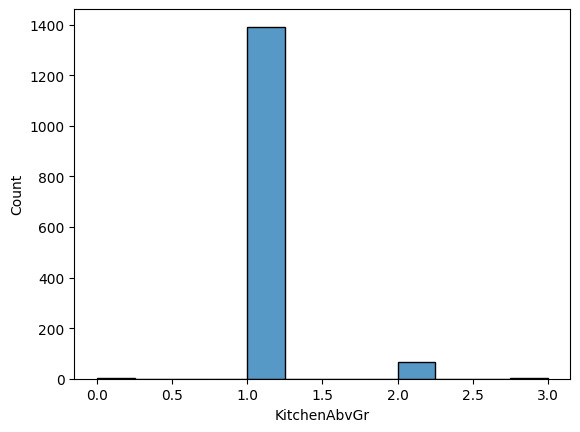

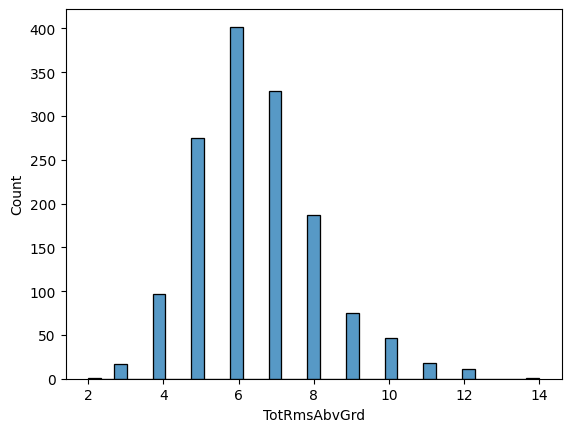

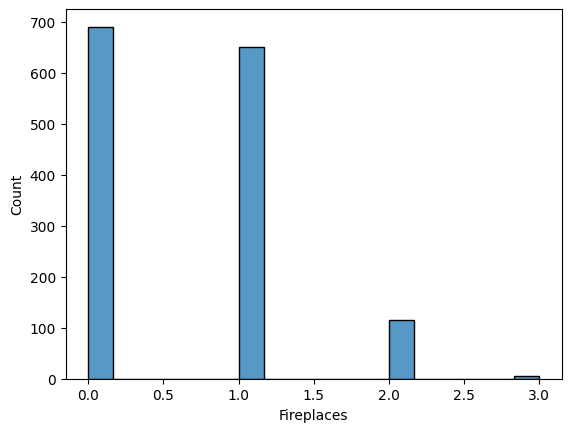

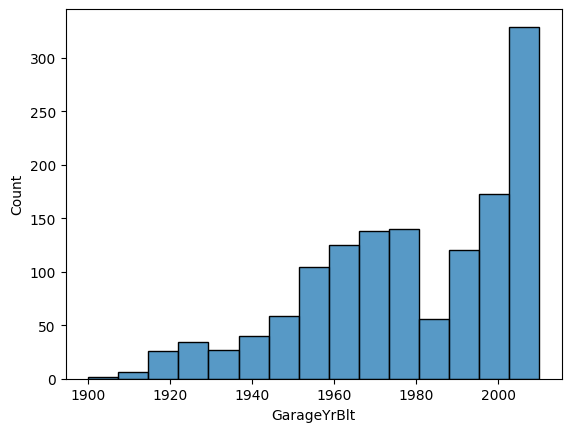

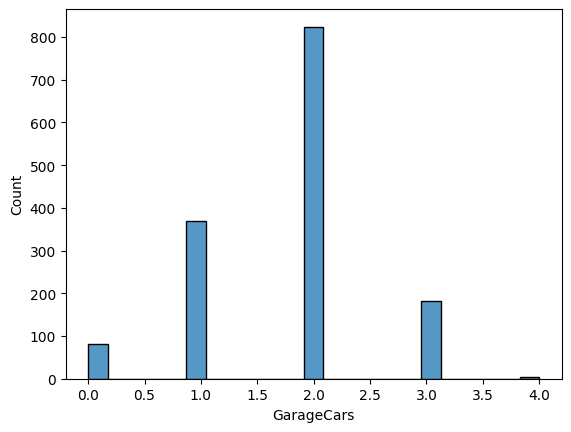

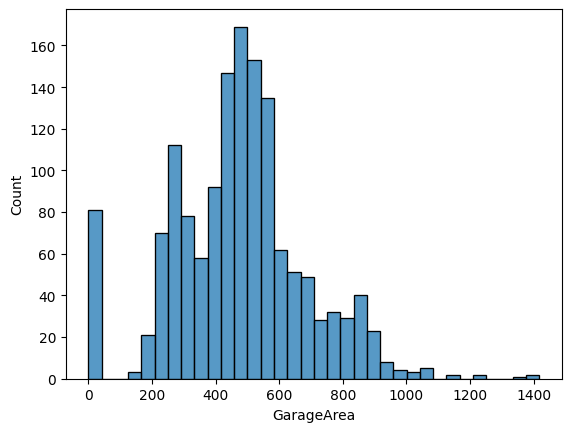

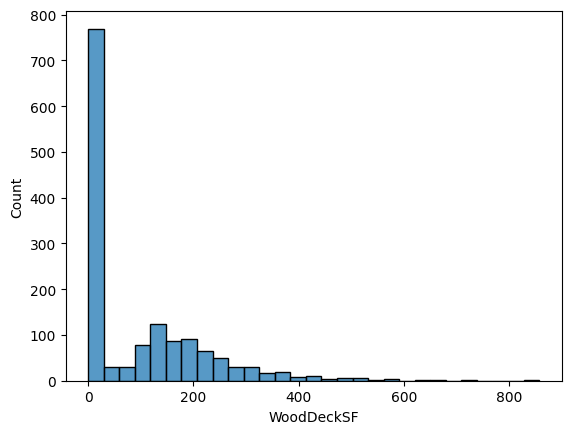

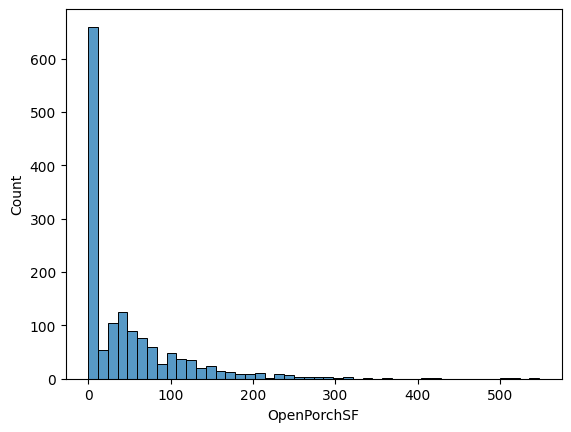

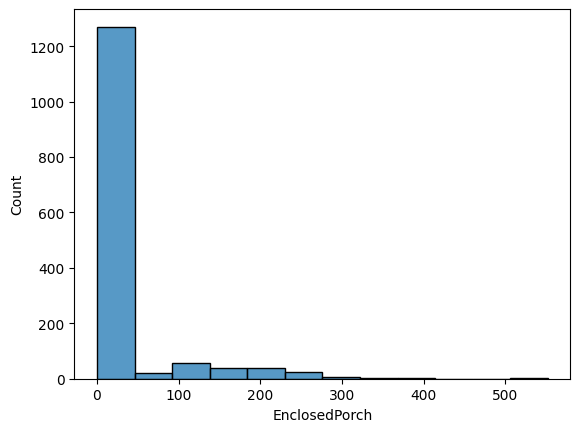

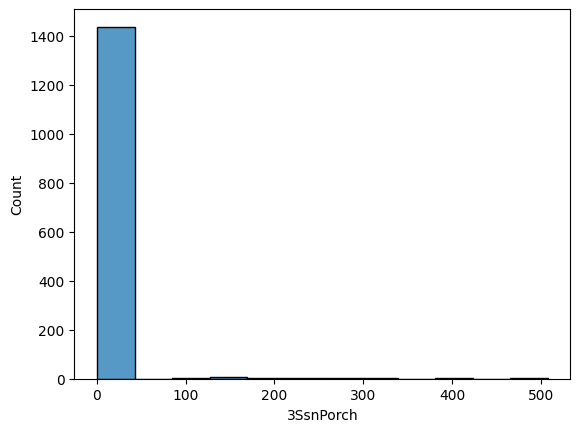

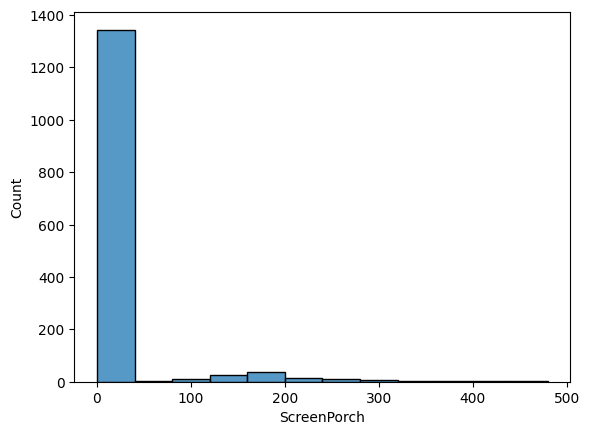

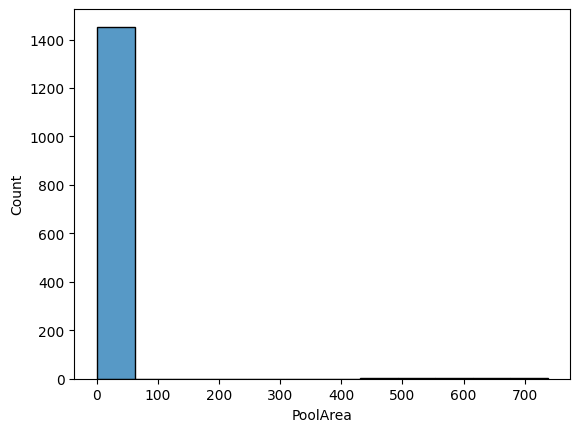

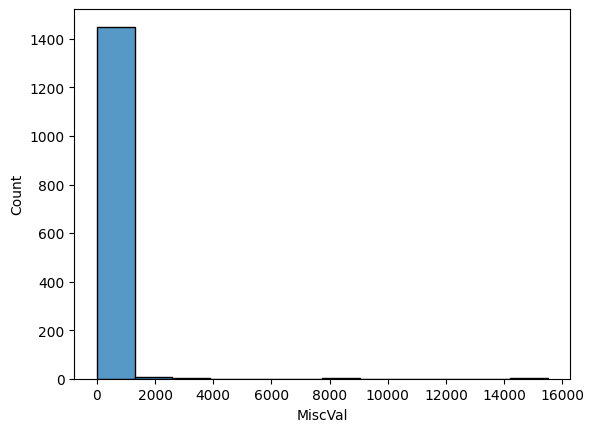

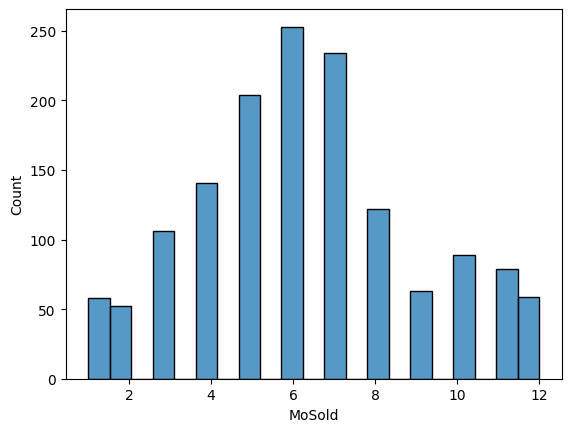

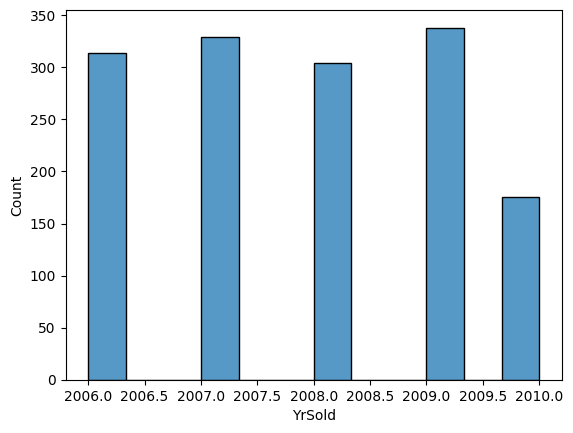

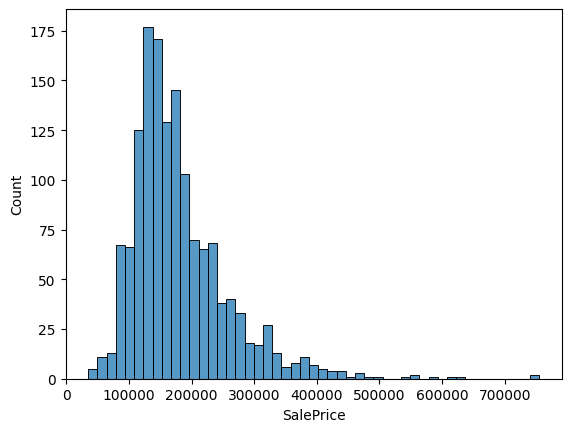

In [19]:
# Histogram to shown distribution
for i in df.select_dtypes(include = 'number').columns:
    sns.histplot(data = df, x = i )
    plt.show()

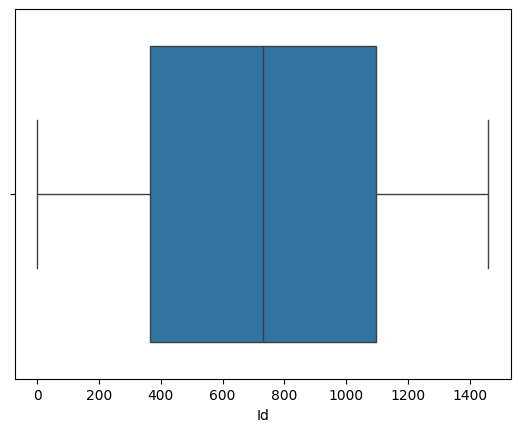

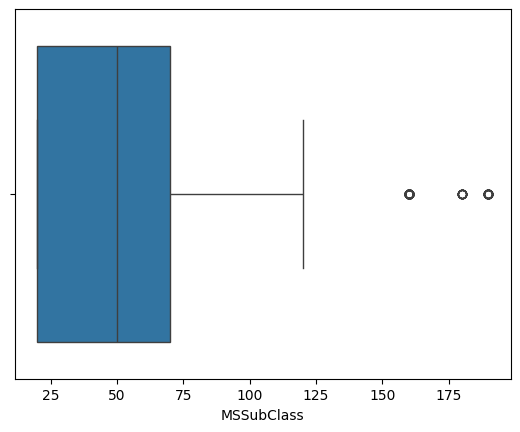

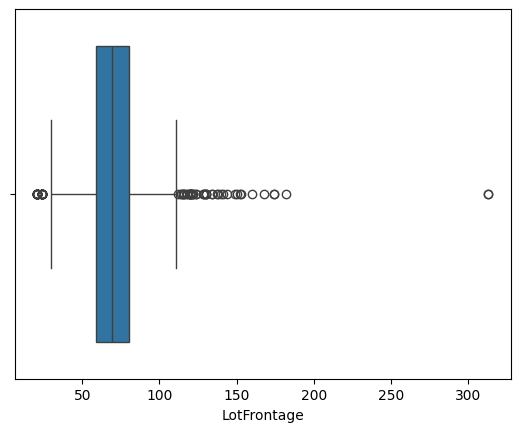

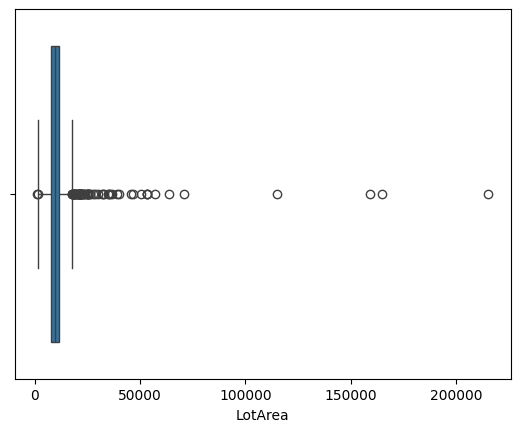

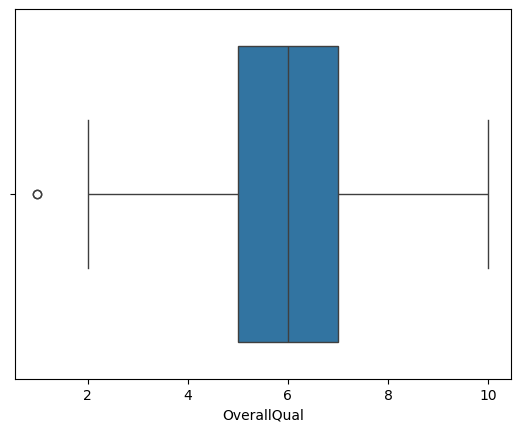

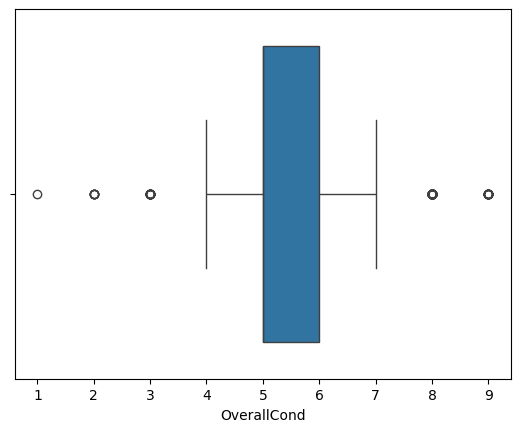

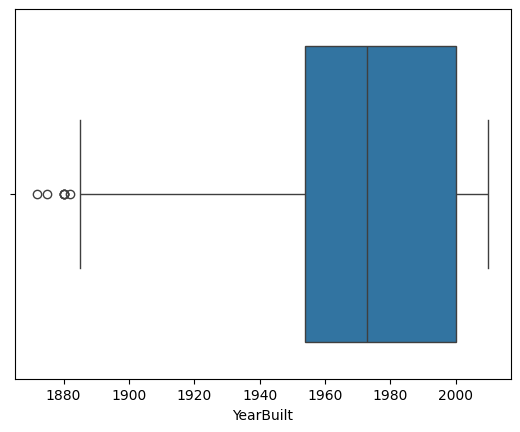

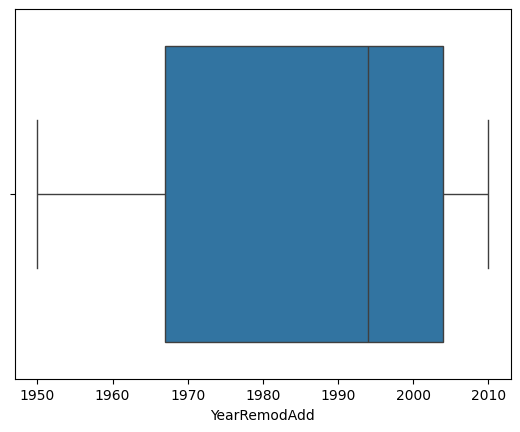

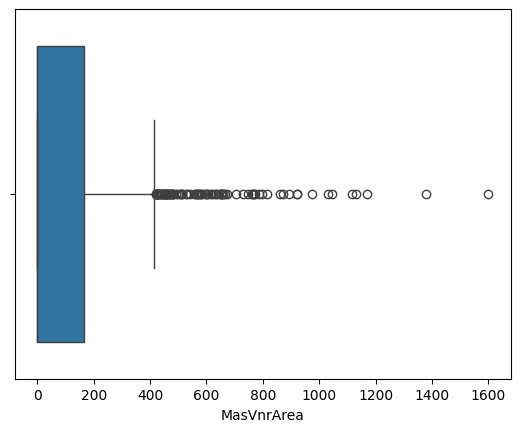

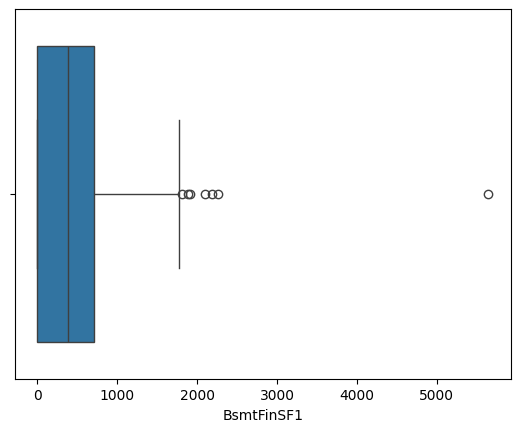

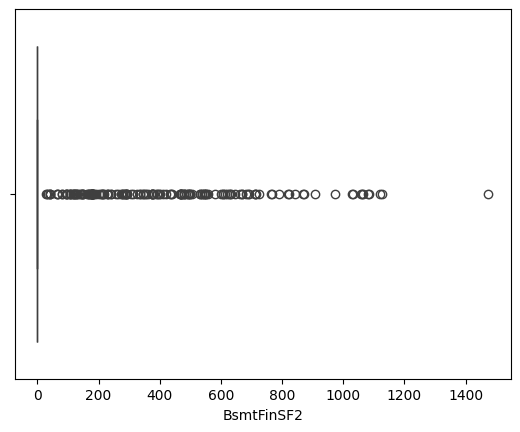

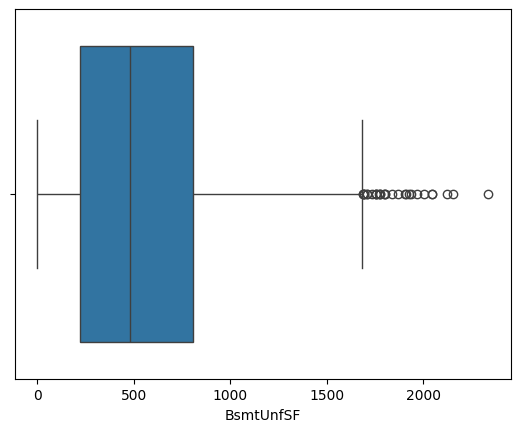

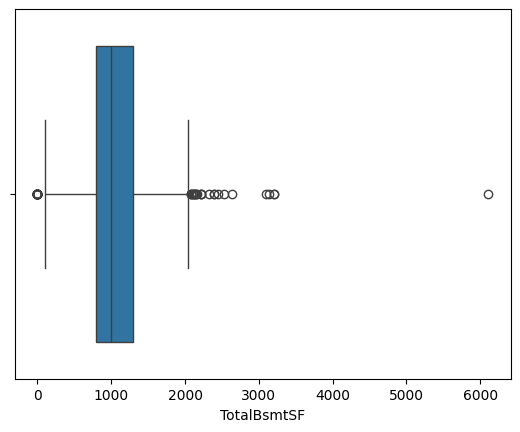

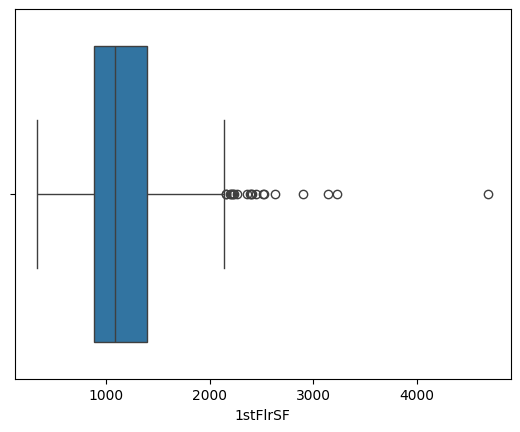

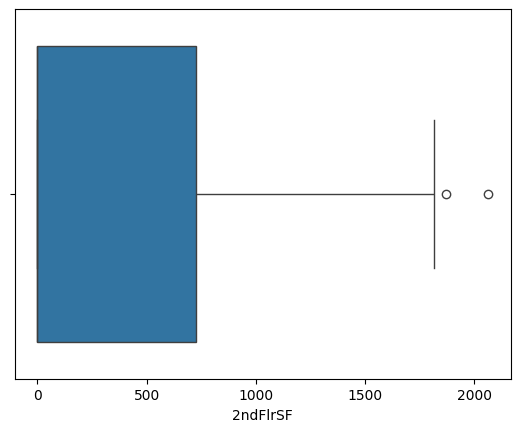

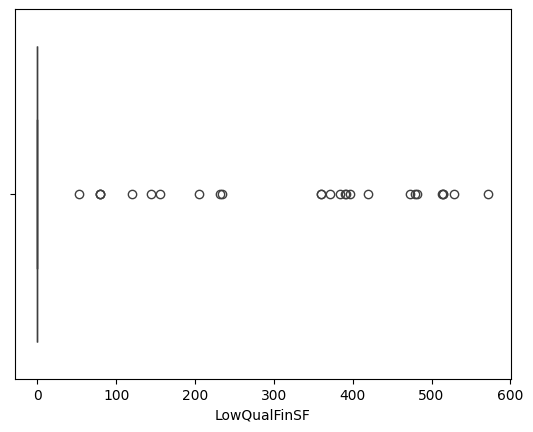

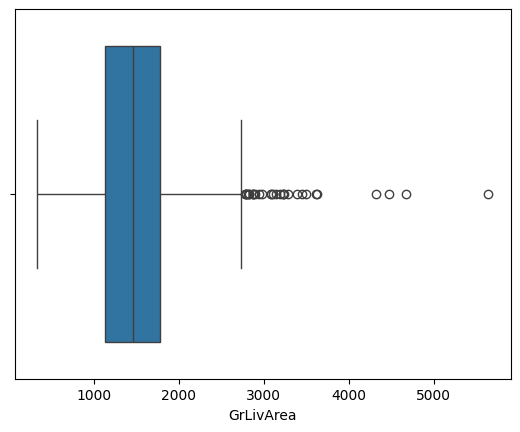

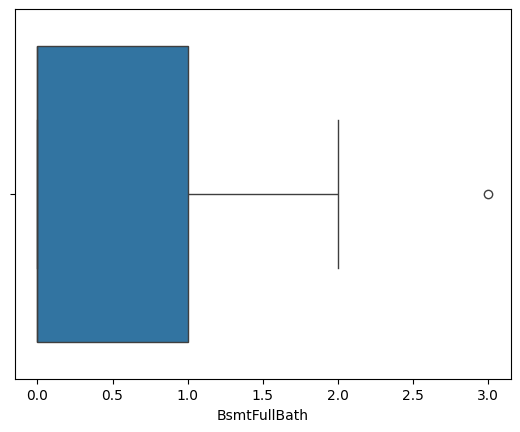

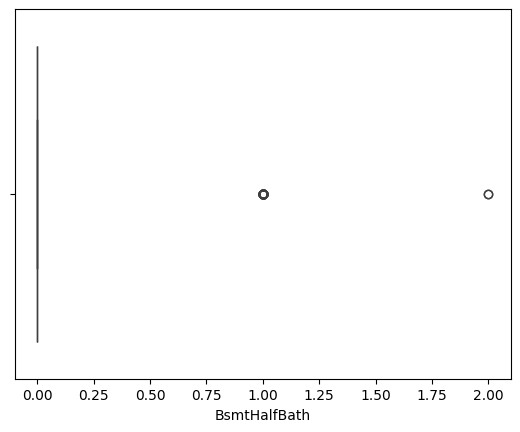

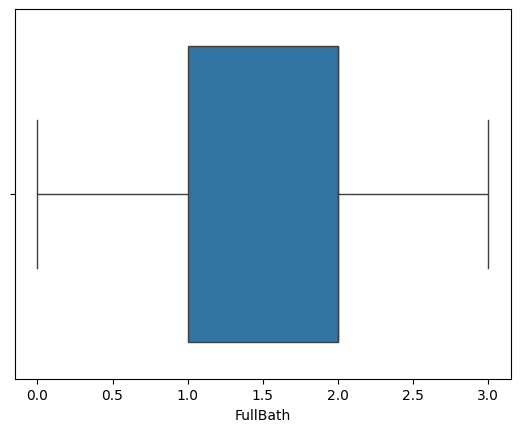

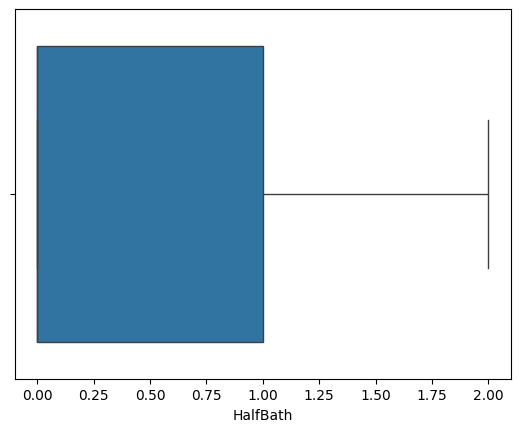

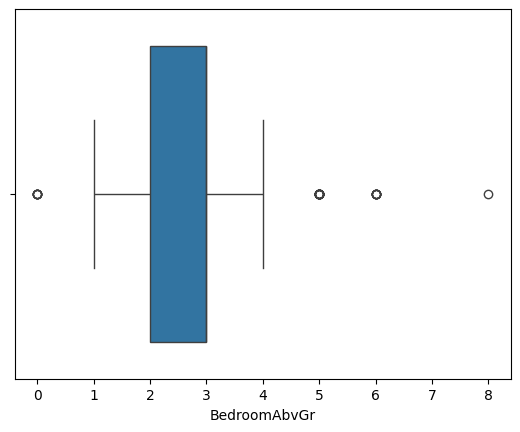

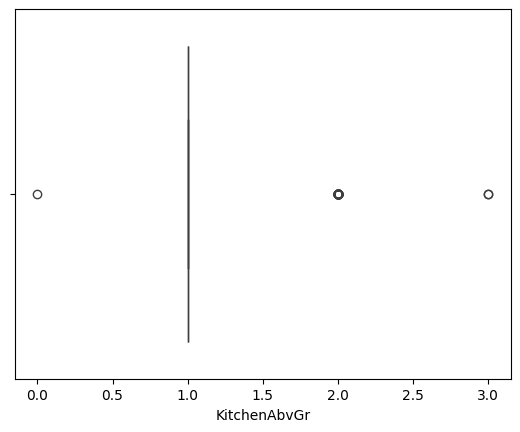

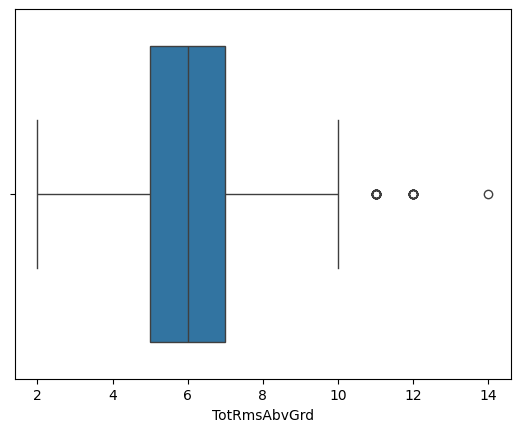

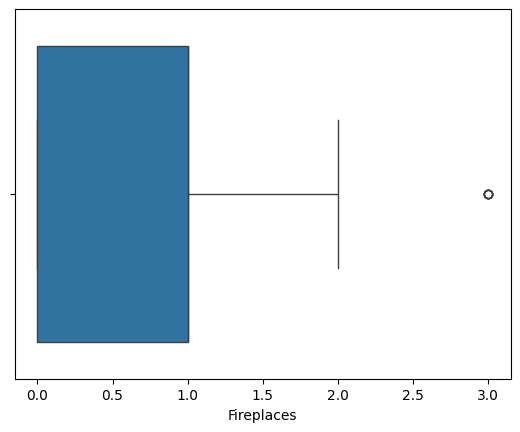

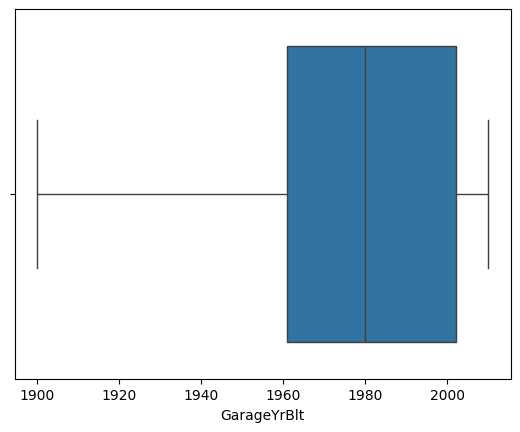

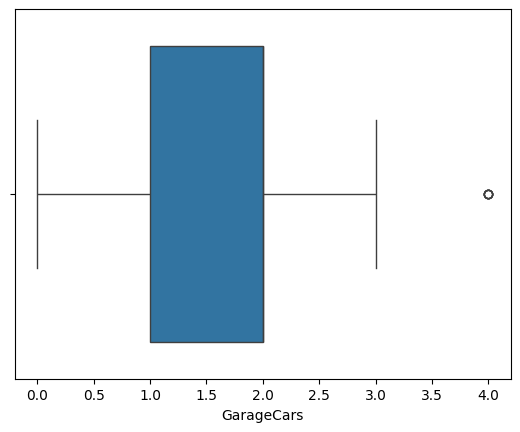

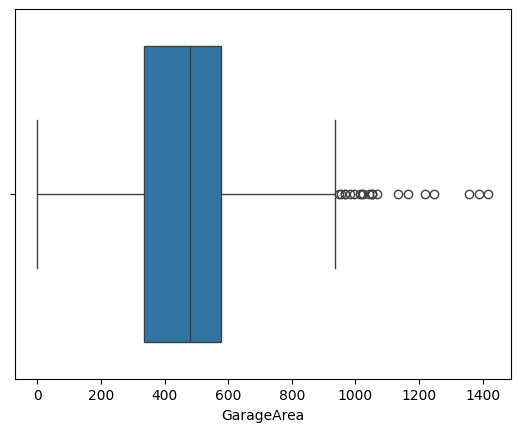

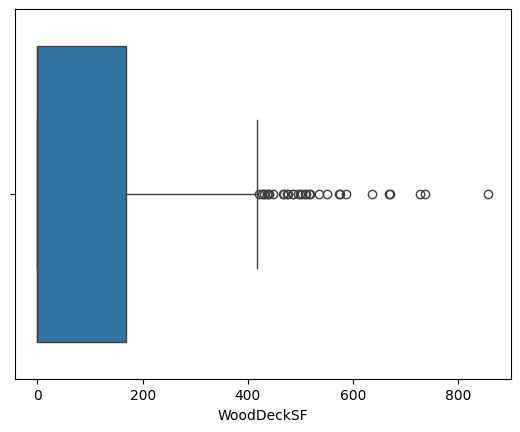

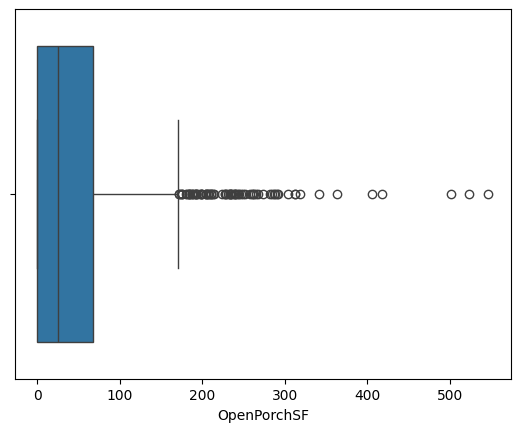

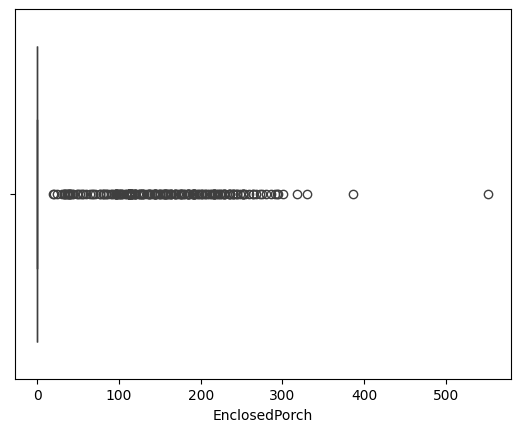

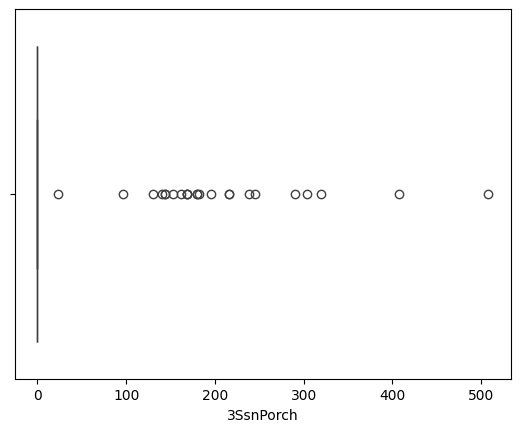

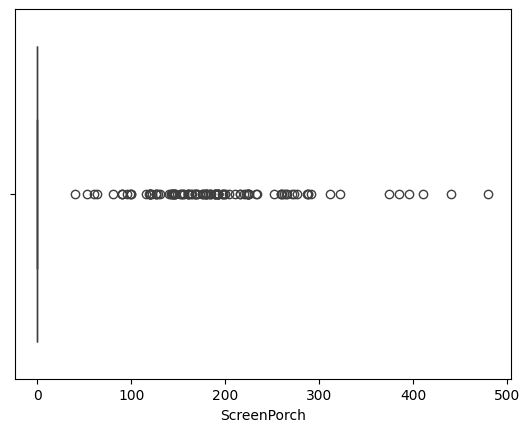

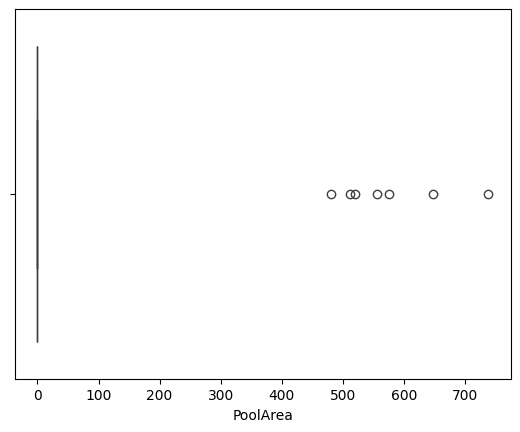

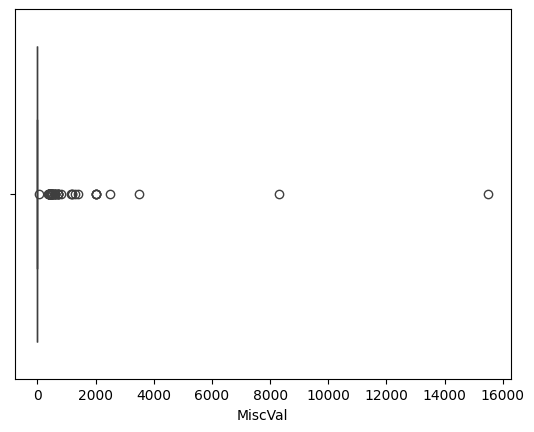

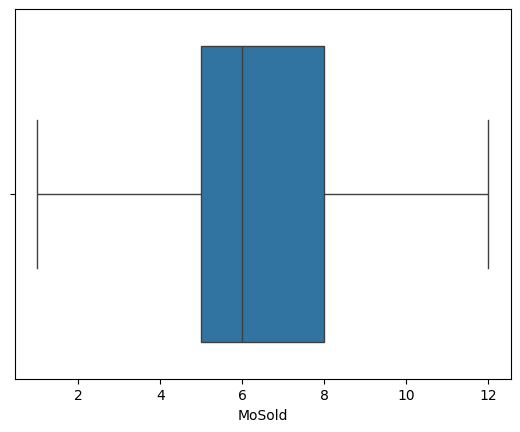

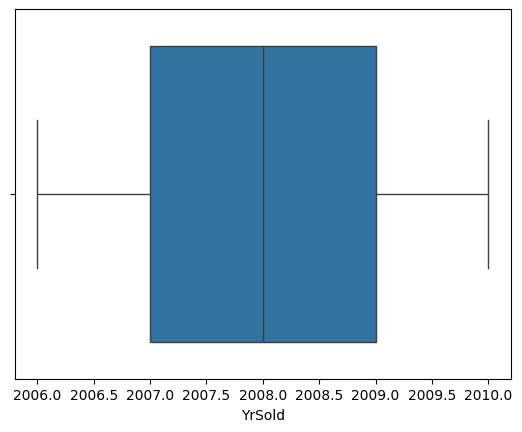

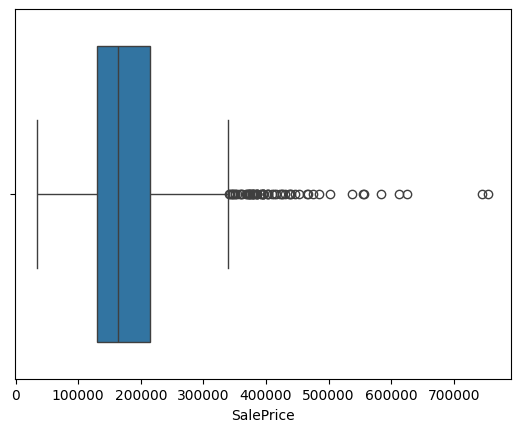

In [20]:
#Botplox to identify outliers
for i in df.select_dtypes(include = 'number').columns:
    sns.boxplot(data = df, x = i )
    plt.show()

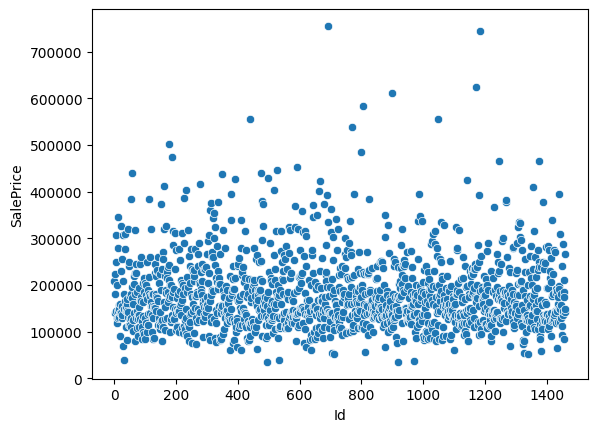

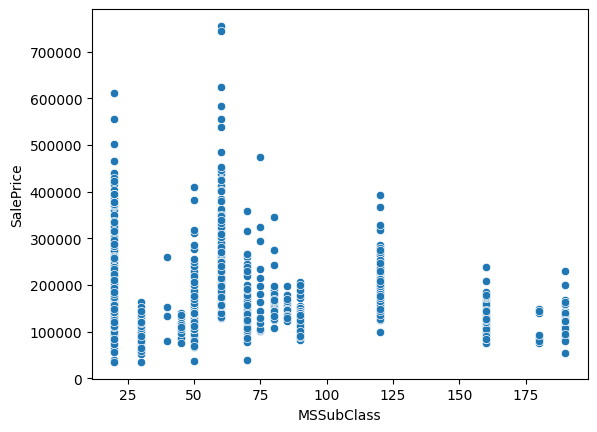

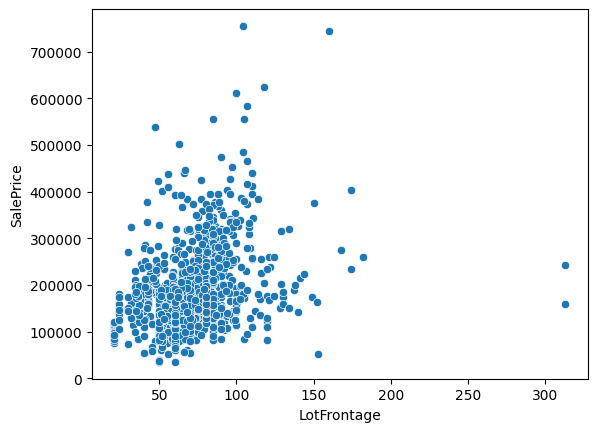

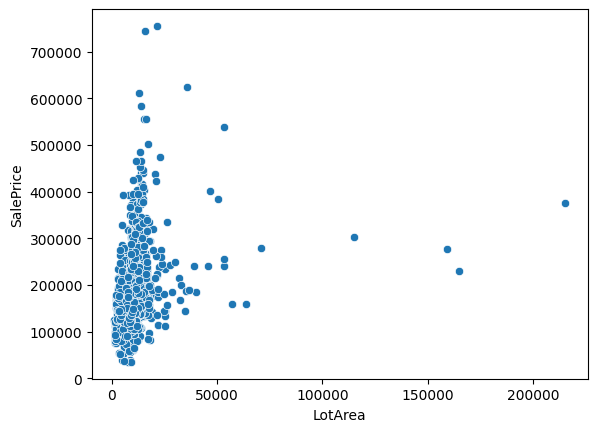

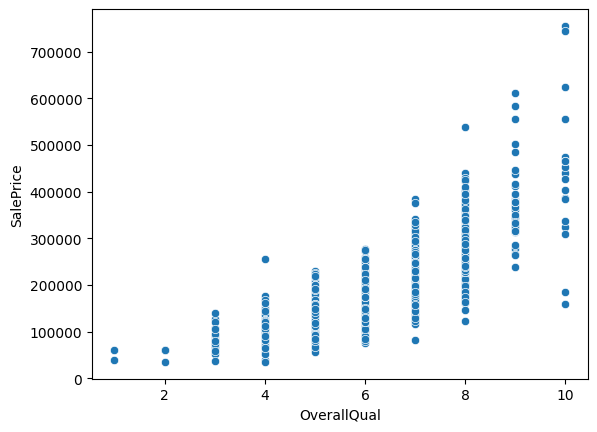

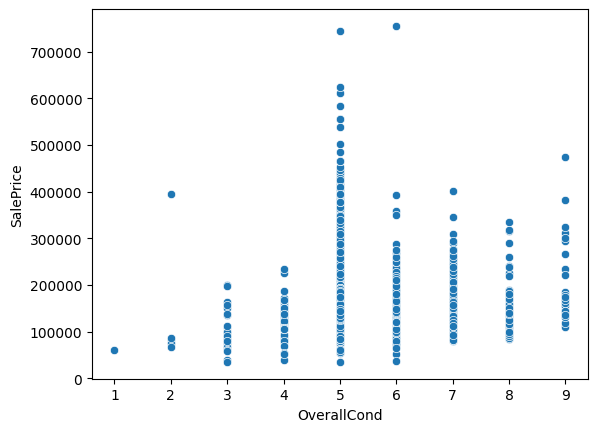

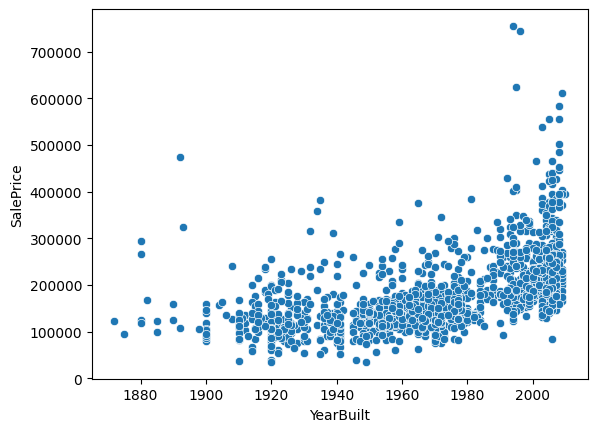

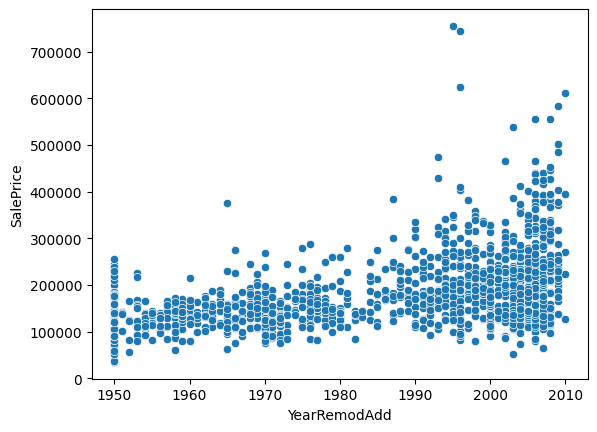

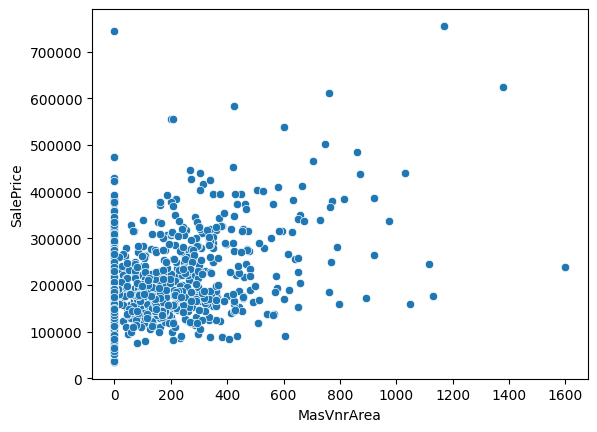

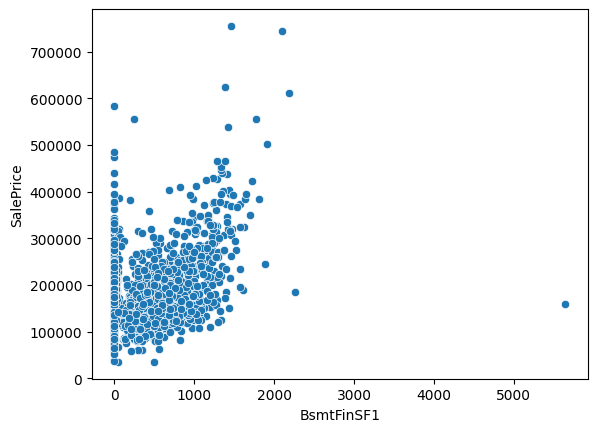

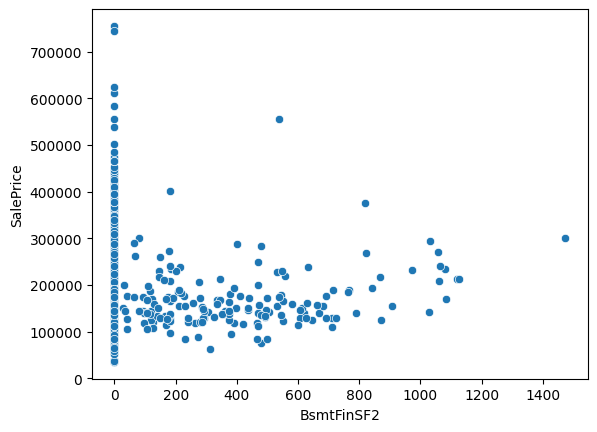

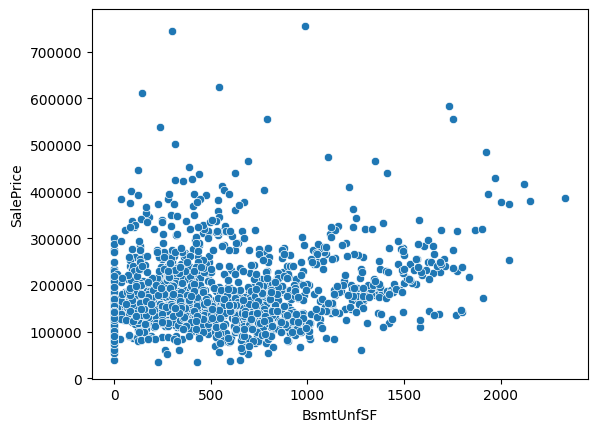

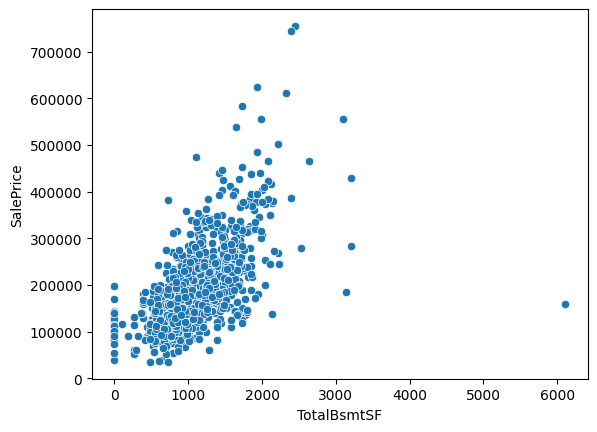

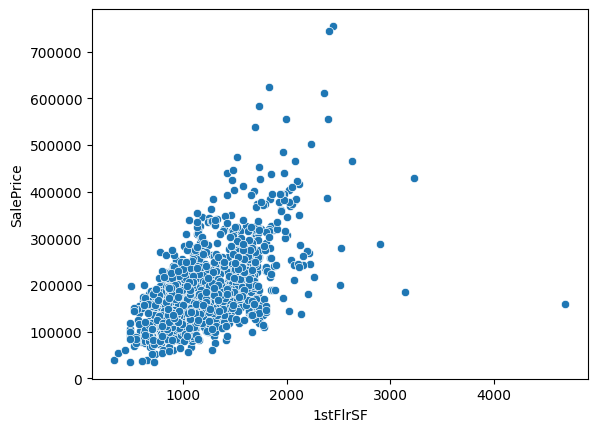

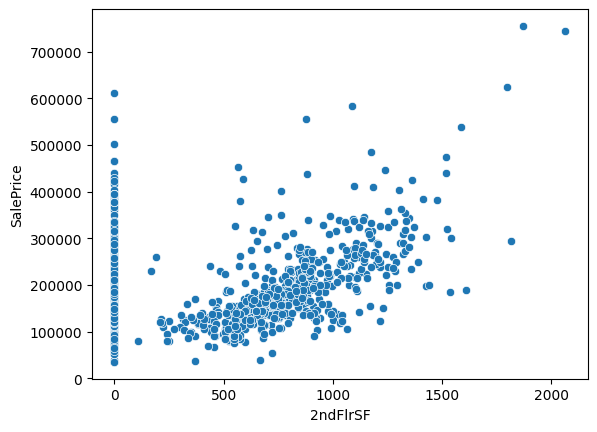

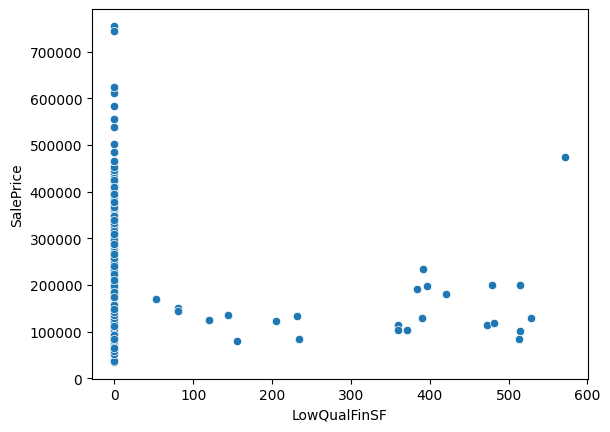

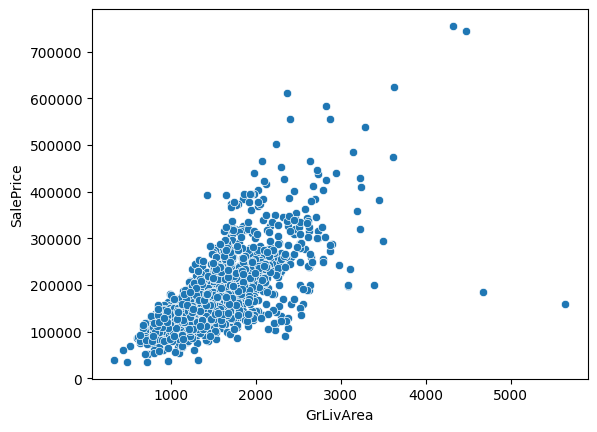

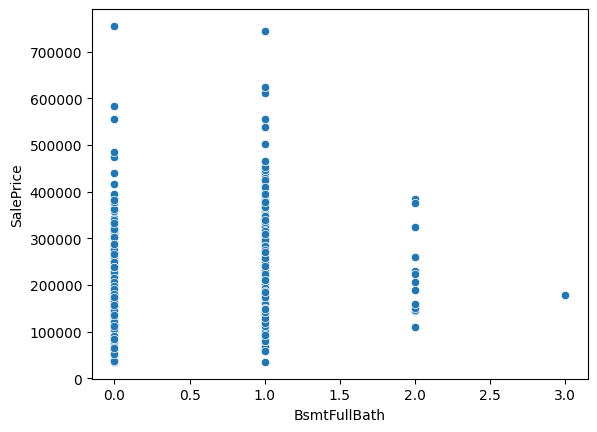

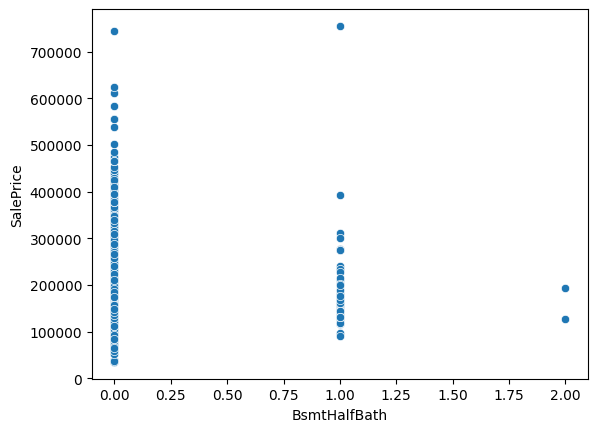

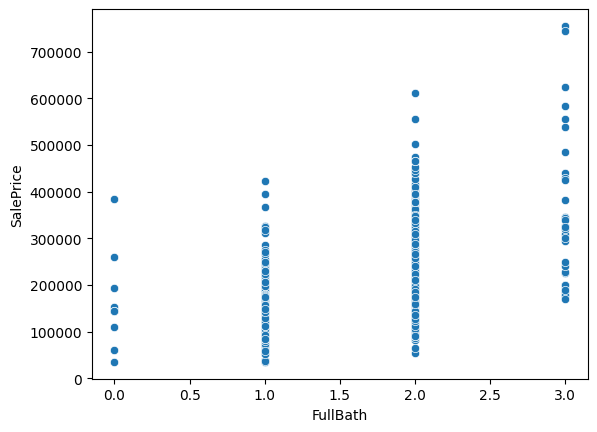

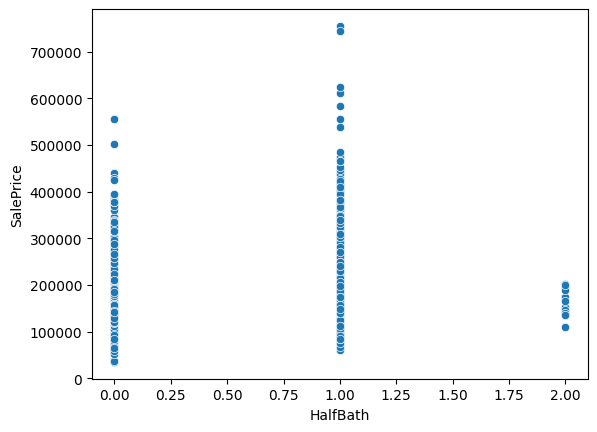

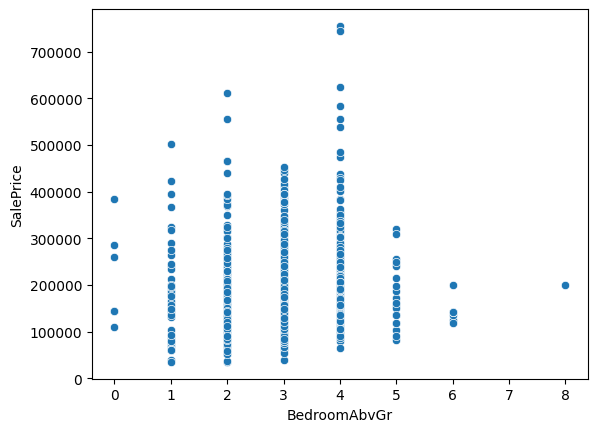

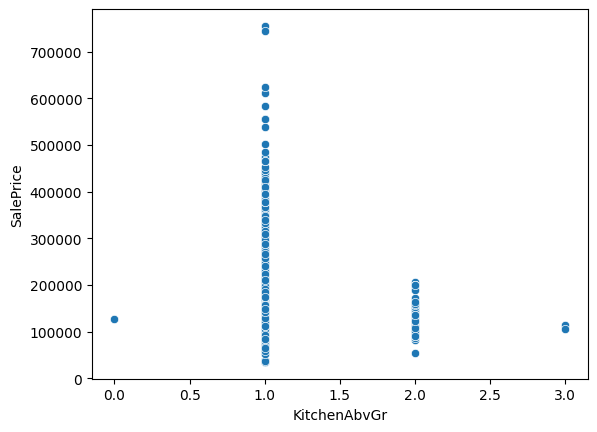

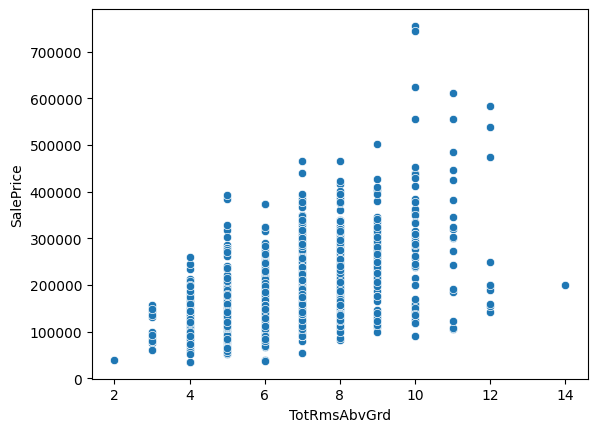

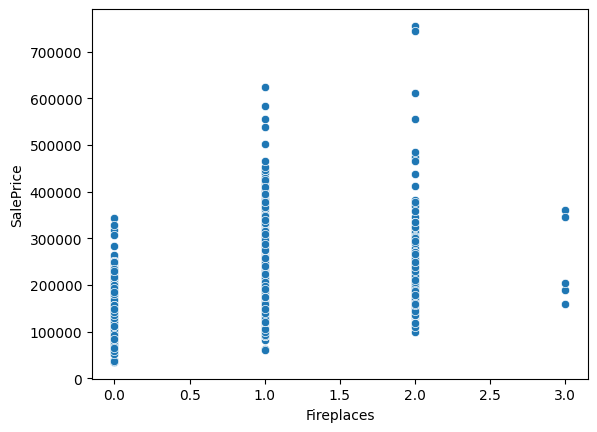

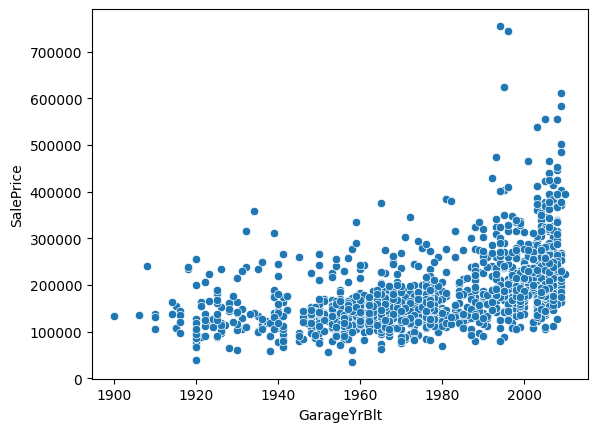

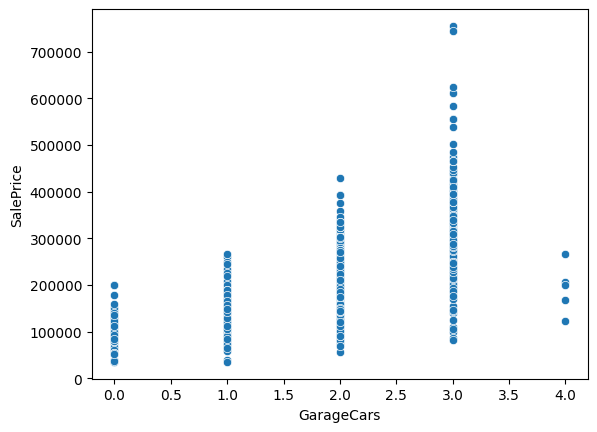

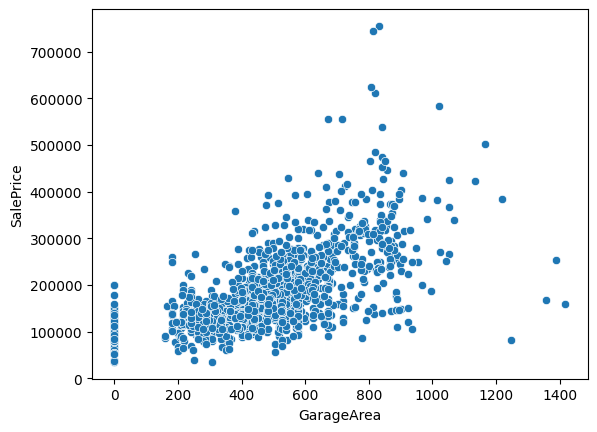

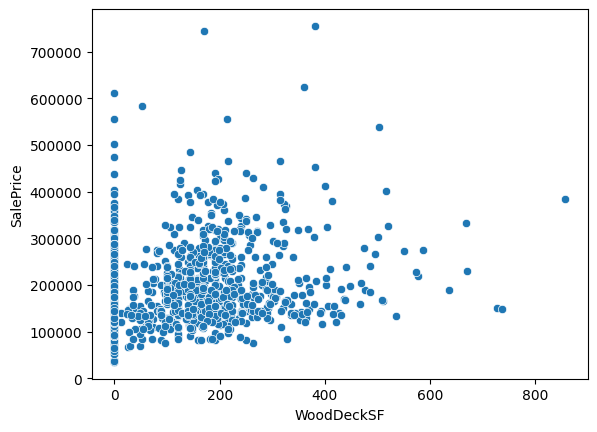

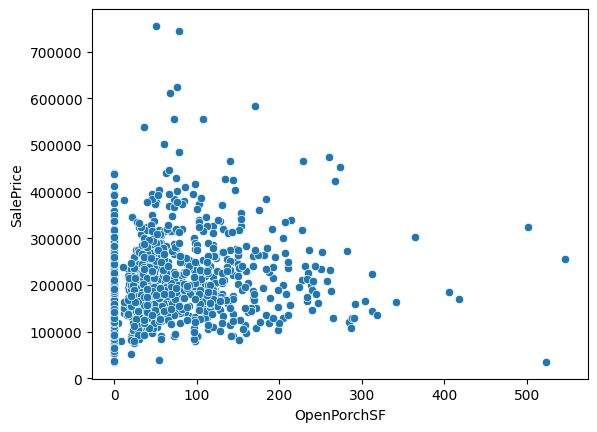

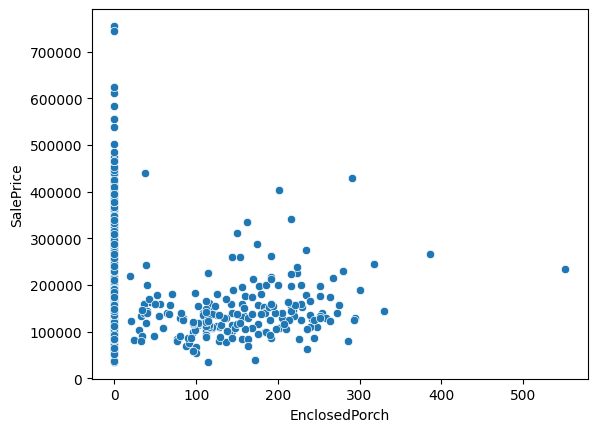

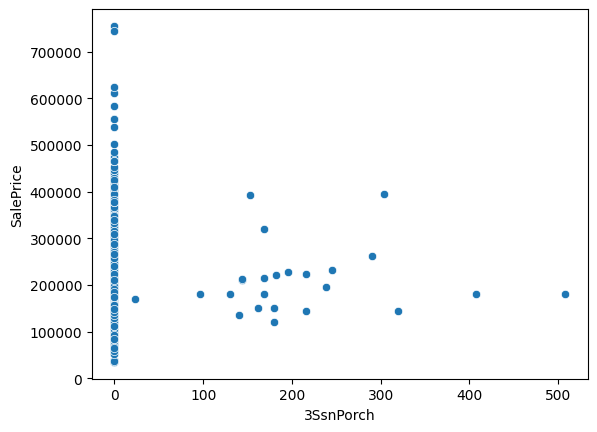

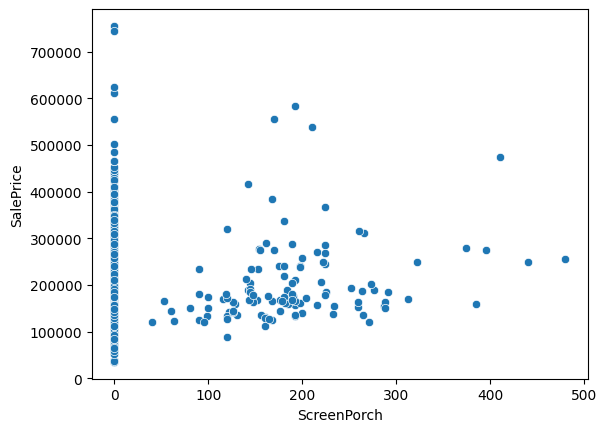

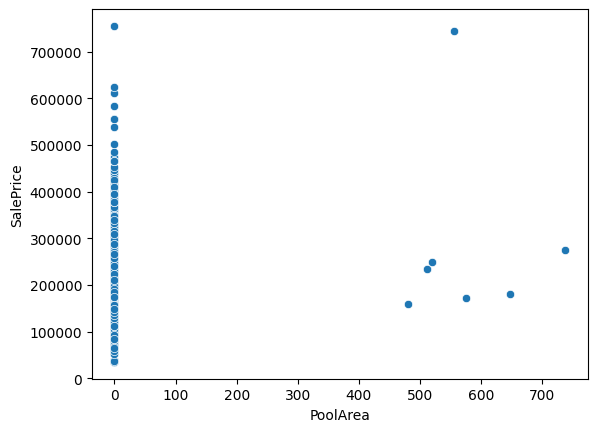

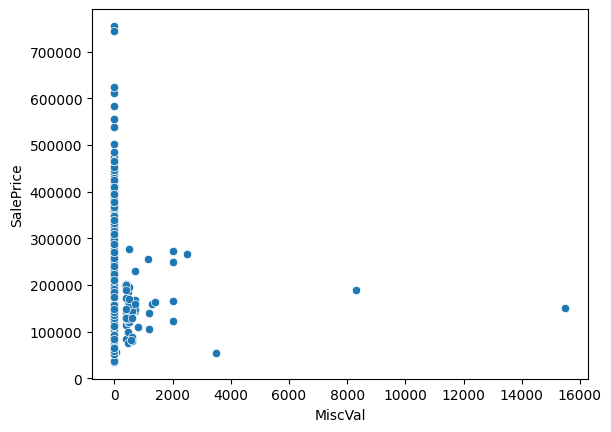

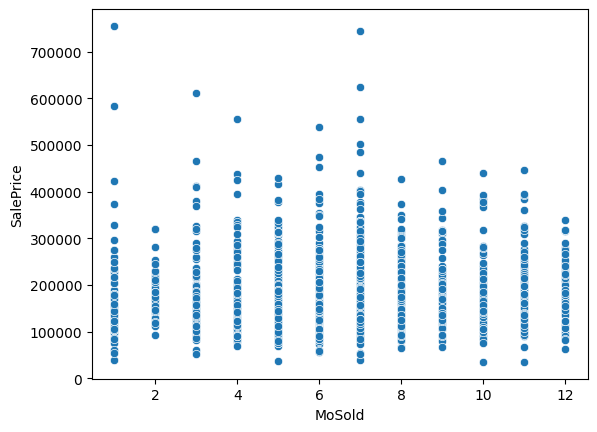

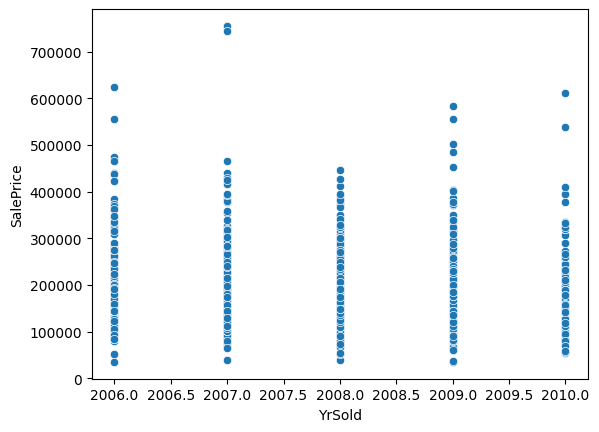

In [21]:
# Use Scatterplot to show relationships
for i in df[
    ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']
]:

    sns.scatterplot(data = df, x = i, y = 'SalePrice')
    plt.show()

In [23]:
#Check for correlation
s = df.select_dtypes(include = 'number').corr()

<Axes: >

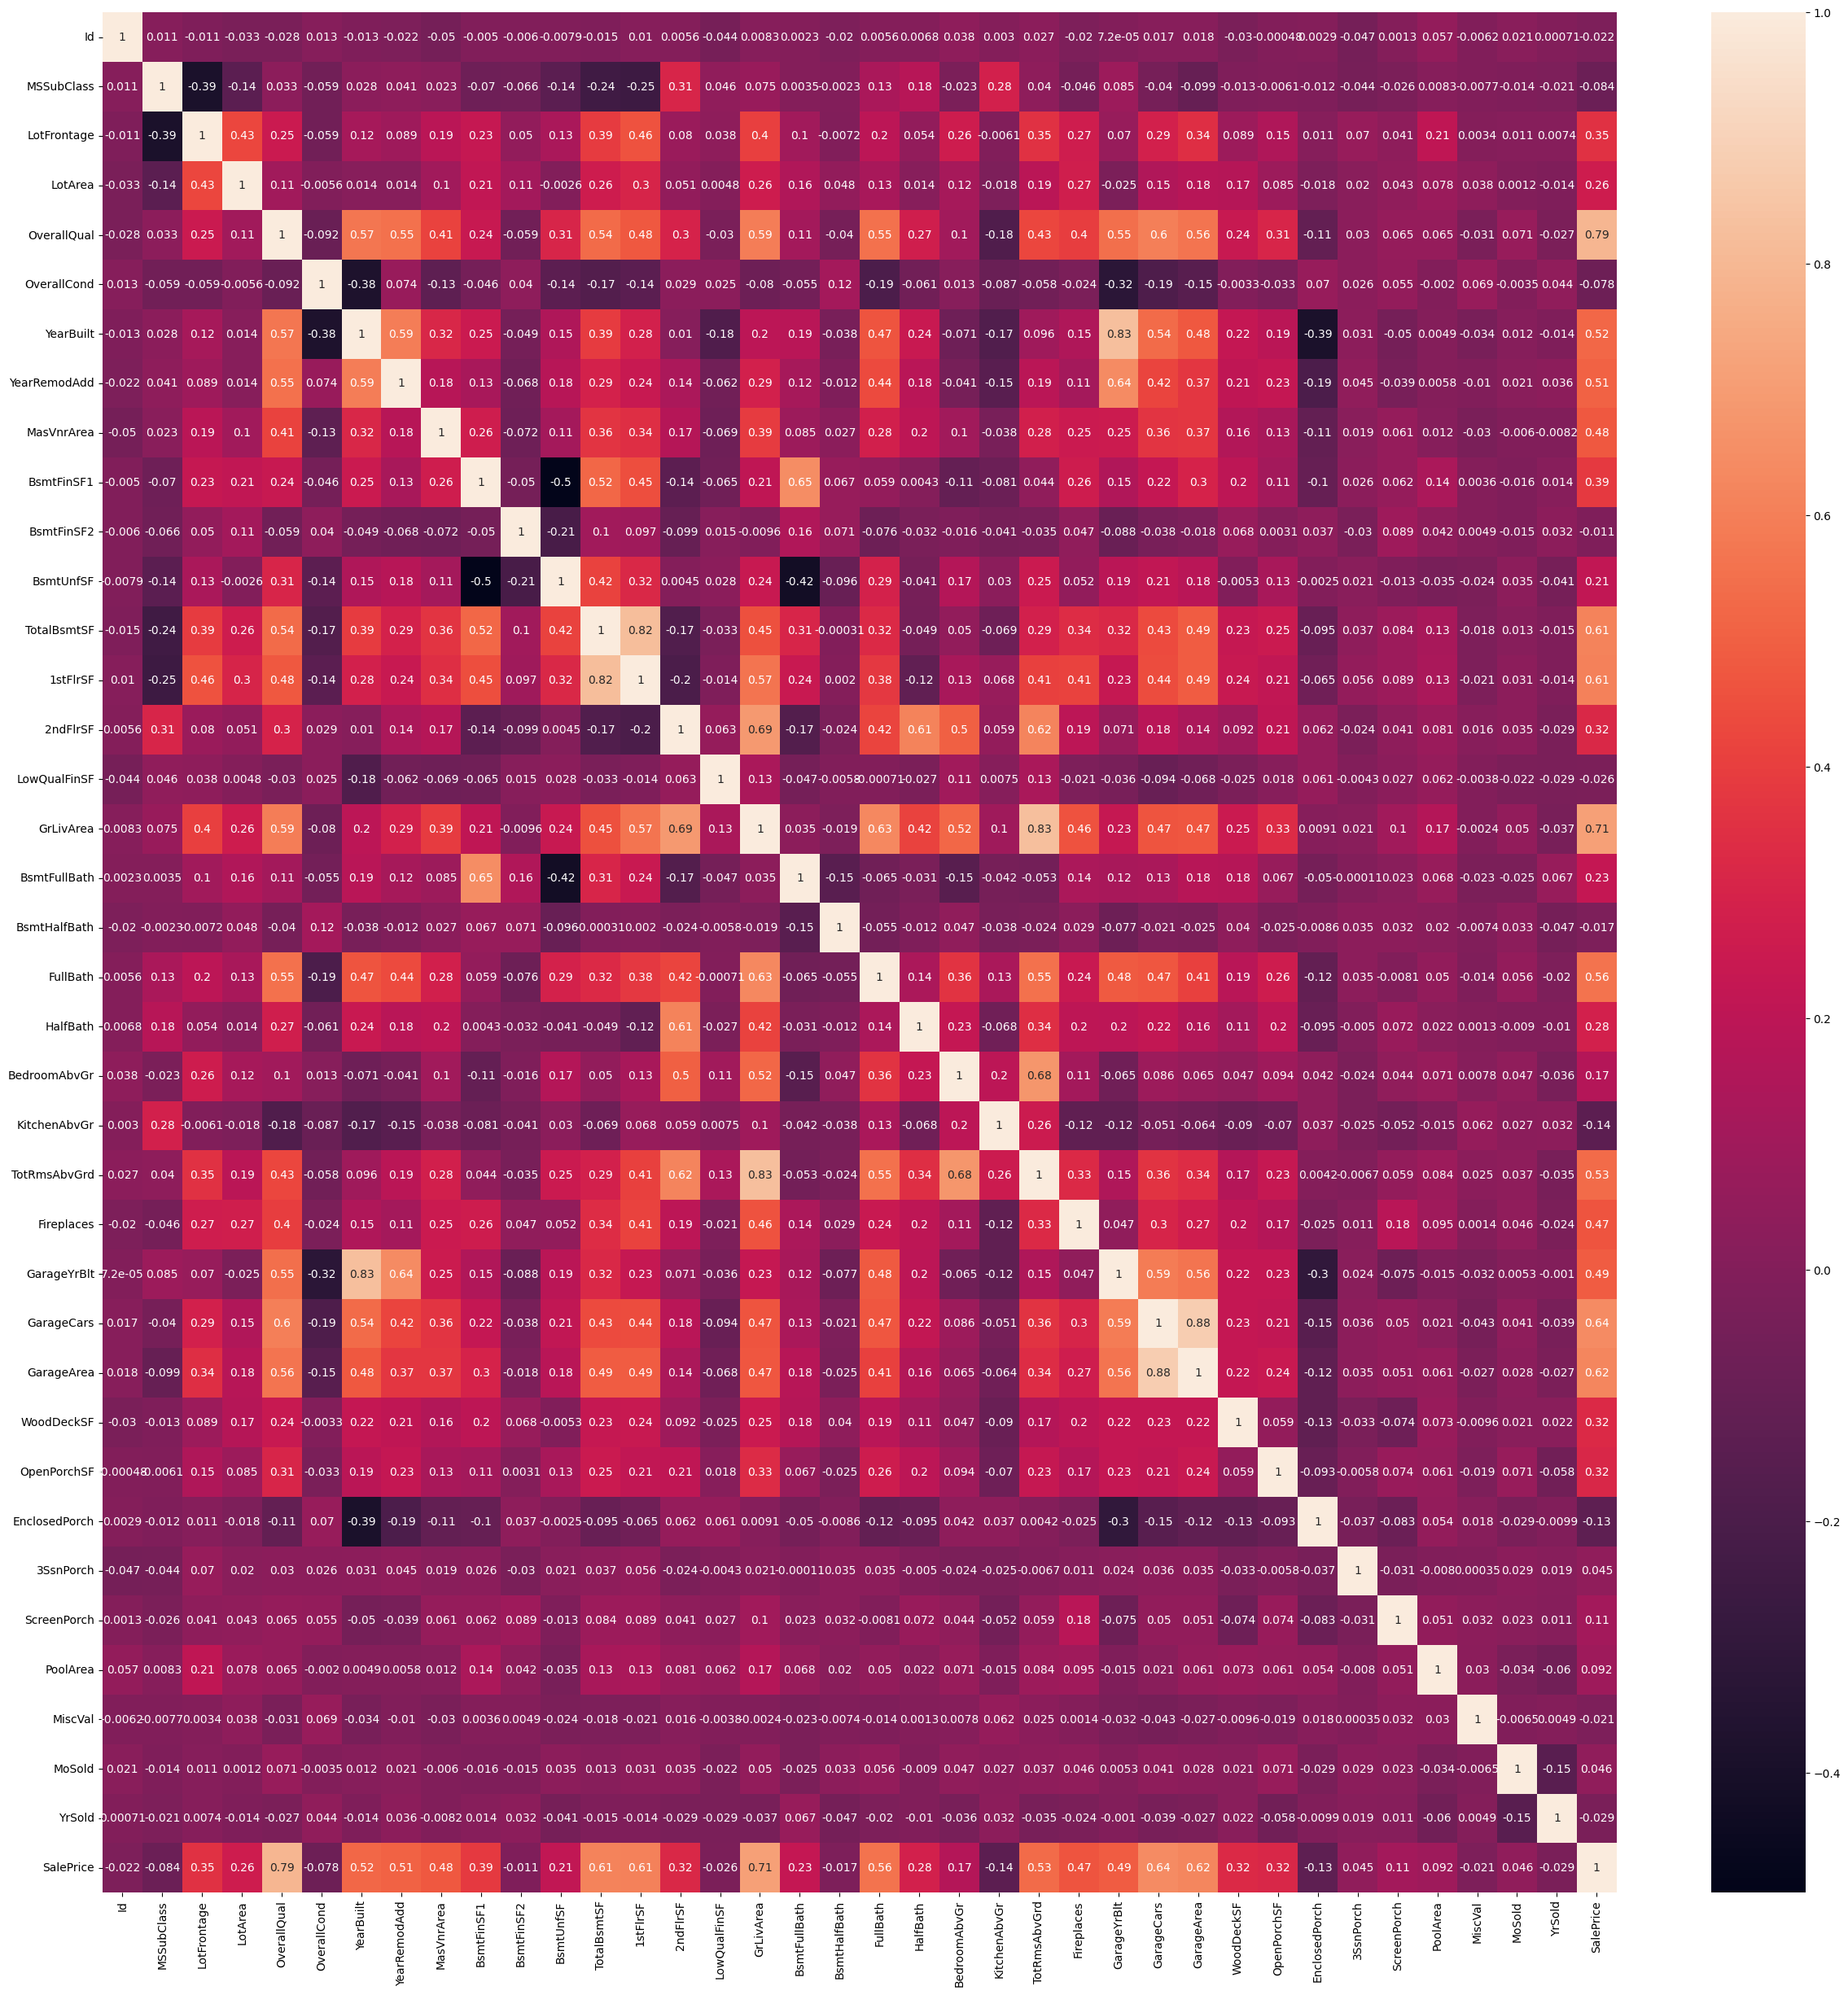

In [24]:
#Do a heatmap
plt.figure(figsize = (30,30))
sns.heatmap(s, annot= True)

### 1.5 Missing Value Treatment

In [77]:
# Choose the method of imputation 
# Like mean, median, mode, or KNNInputer

In [28]:
df.select_dtypes(include = 'number').isnull().sum()[df.select_dtypes(include = 'number').isnull().sum() > 0]

Series([], dtype: int64)

In [27]:
for i in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt' ]:
    df[i].fillna(df[i].median(), inplace = True)

/var/folders/tl/77hlg4nx1b30swkg3ys2cmjr0000gn/T/ipykernel_4635/913444270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace = True)
/var/folders/tl/77hlg4nx1b30swkg3ys2cmjr0000gn/T/ipykernel_4635/913444270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [29]:
cat_cols = df.select_dtypes(include = ['object', 'category']).columns
date_cols = df.select_dtypes(include = ['datetime64[ns]']).columns

In [30]:
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [31]:
for col in date_cols:
    df[col] = df[col].fillna(df[col].ffill())

### 1.6 Outlier treatment

<Axes: ylabel='GrLivArea'>

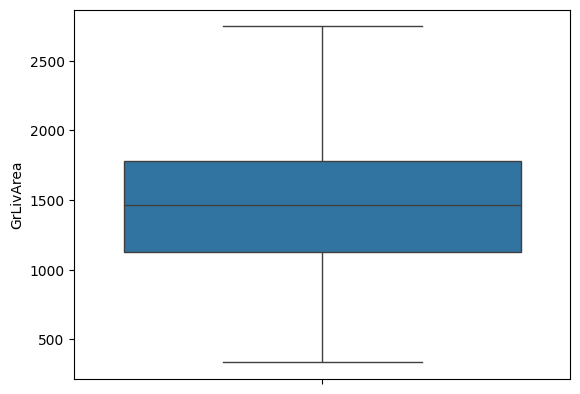

In [36]:
#GrLivArea
sns.boxplot(df['GrLivArea'])

In [35]:
Q1 = df['GrLivArea'].quantile(0.25)
Q3 = df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 +1.5*IQR
df['GrLivArea'] = np.where(df['GrLivArea']>upper, upper, np.where(df['GrLivArea'] < lower, lower, df['GrLivArea']))

### Garbage Treatemnt and Duplicates

In [37]:
df.drop_duplicates()
#check datatype 'Object', usually signal a mix of types

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Grvl      Reg   
1        2          20       RL         80.0     9600   Pave  Grvl      Reg   
2        3          60       RL         68.0    11250   Pave  Grvl      IR1   
3        4          70       RL         60.0     9550   Pave  Grvl      IR1   
4        5          60       RL         84.0    14260   Pave  Grvl      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Grvl      Reg   
1456  1457          20       RL         85.0    13175   Pave  Grvl      Reg   
1457  1458          70       RL         66.0     9042   Pave  Grvl      Reg   
1458  1459          20       RL         68.0     9717   Pave  Grvl      Reg   
1459  1460          20       RL         75.0     9937   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1            Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2            Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3            Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4            Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1456         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1457         Lvl    AllPub  ...        0     Gd  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1459         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

### 1.7 Normalization

In [38]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include = 'number').columns.drop('SalePrice')
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### 1.8 Encoding

In [39]:
# do encoding using one hot encoding
dummy = pd.get_dummies(data = df, columns = cat_cols, drop_first= True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   float64
 18  OverallC

## 2. Linear Regression

In [65]:
#Import train_test_split, LinearRegression and metrics from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [55]:
#Drop target column from original Dataset
X = dummy.drop("SalePrice", axis = 1) #All features
y = dummy['SalePrice'] #Target

In [56]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [57]:
#model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
#Prediction
y_pred = model.predict(X_test)

In [67]:
#Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"mae = {mse}")
print(f"rms = {rmse}")
print(f"r2 Score = {r2}")

mae = 2678215338.2780967
rms = 51751.47667727073
r2 Score = 0.6508342323474328


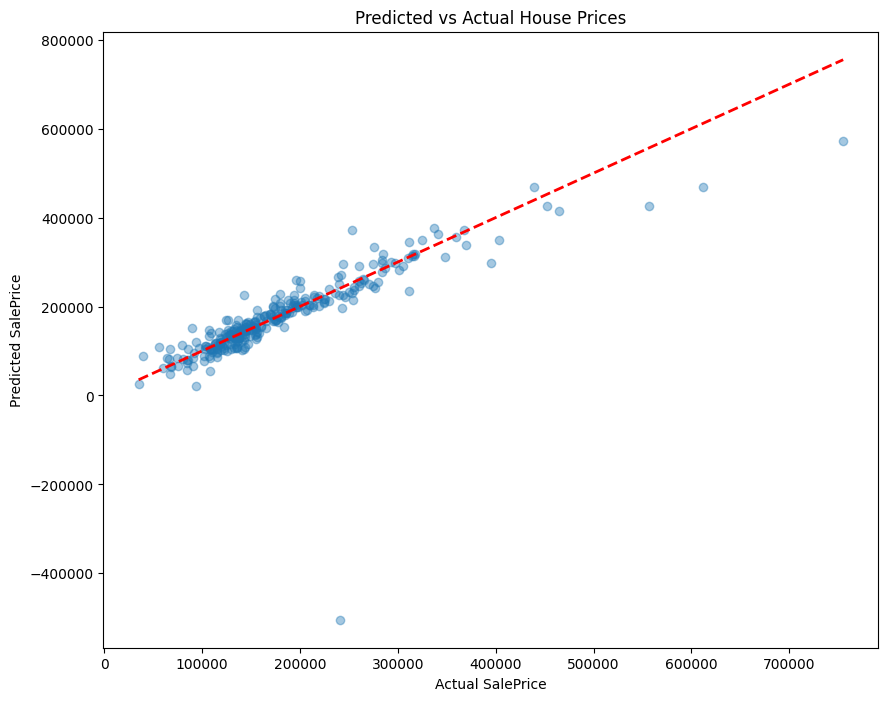

In [64]:
plt.figure(figsize=(10,8))

# Scatter plot of true vs predicted
plt.scatter(y_test, y_pred, alpha=0.4)

# Reference line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual House Prices")
plt.show()

In [68]:
df['SalePrice'].max()

np.int64(755000)